In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv("music.csv")
df.head(5)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [5]:
X = df.drop(columns=['genre'])
y = df['genre']

model = DecisionTreeClassifier()
model.fit(X, y)
print(X.head(5))
print(y.head(5))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   age  gender
0   20       1
1   23       1
2   25       1
3   26       1
4   29       1
0    HipHop
1    HipHop
2    HipHop
3      Jazz
4      Jazz
Name: genre, dtype: object


In [7]:
predictions = model.predict(X_test)
predictions

score = accuracy_score(y_test, predictions)
score

1.0

In [15]:
test_sizes = np.linspace(0.1, 0.9, 9)  # Different test sizes from 0.1 to 0.9
accuracies = []

# Model Accuracy for Different Test Sizes

The following plot shows the accuracy of a Decision Tree Classifier model for various test sizes. As the test size increases, the accuracy generally decreases.

## Key Observations
- Smaller test sizes (up to 40%) yield higher accuracy, potentially indicating overfitting.
- Accuracy drops sharply beyond a test size of 40%.

## Conclusion
Choosing an appropriate test size is crucial for reliable model performance.


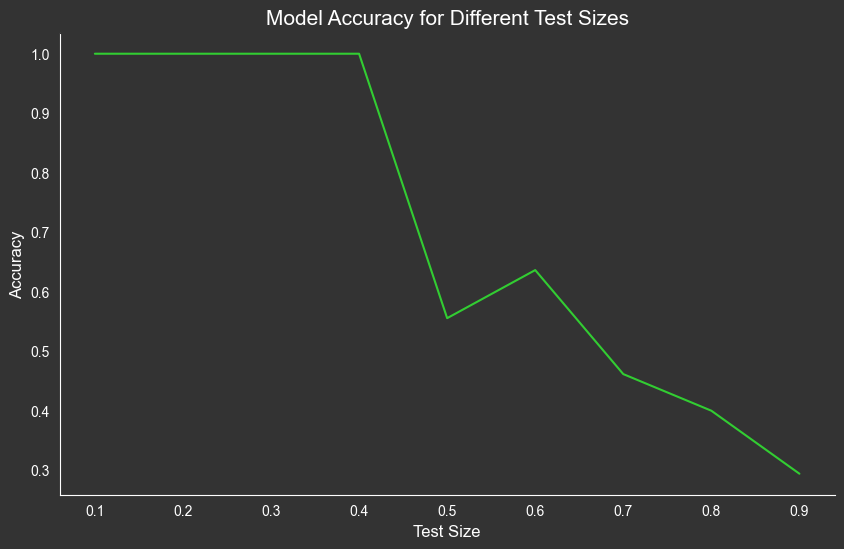

In [20]:
test_sizes = np.linspace(0.1, 0.9, 9)  # Different test sizes from 0.1 to 0.9
accuracies = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)
    accuracies.append(score)

results = pd.DataFrame({'Test Size': test_sizes, 'Accuracy': accuracies})

sns.set_style("dark")
plt.figure(figsize=(10, 6))

# Plot using Seaborn with a green line
sns.lineplot(data=results, x='Test Size', y='Accuracy', color='limegreen')
plt.title('Model Accuracy for Different Test Sizes', fontsize=15, color='white')
plt.xlabel('Test Size', fontsize=12, color='white')
plt.ylabel('Accuracy', fontsize=12, color='white')

# Change the background and tick colors to match the dark theme
plt.gca().set_facecolor('#333333')
plt.gca().spines['top'].set_color('#333333')
plt.gca().spines['right'].set_color('#333333')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().tick_params(colors='white', which='both')

# Remove grid lines
plt.grid(False)

# Change the figure background color
plt.gcf().set_facecolor('#333333')

plt.show()

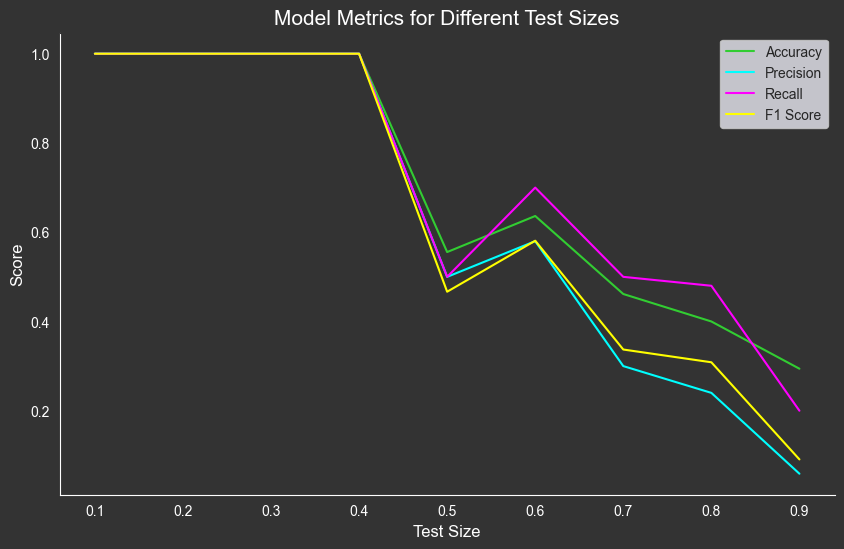

In [27]:
test_sizes = np.linspace(0.1, 0.9, 9)  # Different test sizes from 0.1 to 0.9
accuracies = []
precisions = []
recalls = []
f1_scores = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    precisions.append(precision_score(y_test, predictions, average='macro', zero_division=0))
    recalls.append(recall_score(y_test, predictions, average='macro', zero_division=0))
    f1_scores.append(f1_score(y_test, predictions, average='macro'))

results = pd.DataFrame({
    'Test Size': test_sizes,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

sns.set_style("dark")
plt.figure(figsize=(10, 6))

# Plot using Seaborn with a green line for Accuracy
sns.lineplot(data=results, x='Test Size', y='Accuracy', color='limegreen', label='Accuracy')
sns.lineplot(data=results, x='Test Size', y='Precision', color='cyan', label='Precision')
sns.lineplot(data=results, x='Test Size', y='Recall', color='magenta', label='Recall')
sns.lineplot(data=results, x='Test Size', y='F1 Score', color='yellow', label='F1 Score')

plt.title('Model Metrics for Different Test Sizes', fontsize=15, color='white')
plt.xlabel('Test Size', fontsize=12, color='white')
plt.ylabel('Score', fontsize=12, color='white')

# Change the background and tick colors to match the dark theme
plt.gca().set_facecolor('#333333')
plt.gca().spines['top'].set_color('#333333')
plt.gca().spines['right'].set_color('#333333')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().tick_params(colors='white', which='both')

# Remove grid lines
plt.grid(False)

# Change the figure background color
plt.gcf().set_facecolor('#333333')

plt.legend(loc='best')
plt.show()